# Configuring and Running a Simple Neural Network: Binary Classification
The following example illustrates the most important points of configuring, running, and assessing the performance of a NN.  

This example uses binary classification, which simply means that the network will categorize the output layer into either diabetic or not diabetic.  Other archietctures will neural networks are possible, including multicategorical classification and numeric estimation.

There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_1: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* PAYMENT: Did the customer default on their debt? (0=No; 1=Yes)

## Read in the Data

In [1]:
import pandas as pd
df = pd.read_csv('creditcard.csv')

In [2]:
df.head(40)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAYMENT
0,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
1,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0
2,11,200000,2,3,2,34,0,0,2,0,...,2513,1828,3731,2306,12,50,300,3738,66,0
3,16,50000,2,3,3,23,1,2,0,0,...,28771,29531,30211,0,1500,1100,1200,1300,1100,0
4,21,130000,2,3,2,39,0,0,0,0,...,20616,11802,930,3000,1537,1000,2000,930,33764,0
5,26,50000,1,3,2,23,0,0,0,0,...,28967,29829,30046,1973,1426,1001,1432,1062,997,0
6,28,50000,2,3,2,30,0,0,0,0,...,17878,18931,19617,1300,1300,1000,1500,1000,1012,0
7,29,50000,2,3,1,47,-1,-1,-1,-1,...,2040,30430,257,3415,3421,2044,30430,257,0,0
8,51,70000,1,3,2,42,1,2,2,2,...,39423,38659,39362,0,3100,2000,0,1500,1500,1
9,52,100000,2,3,3,43,0,0,0,0,...,39619,35762,33258,2000,1606,1500,2000,1500,1000,0


In [3]:
df.shape

(29546, 25)

So we have 10,000 rows and 14 columns

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAYMENT'],
      dtype='object')

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAYMENT
0,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
1,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0
2,11,200000,2,3,2,34,0,0,2,0,...,2513,1828,3731,2306,12,50,300,3738,66,0
3,16,50000,2,3,3,23,1,2,0,0,...,28771,29531,30211,0,1500,1100,1200,1300,1100,0
4,21,130000,2,3,2,39,0,0,0,0,...,20616,11802,930,3000,1537,1000,2000,930,33764,0


The RowNumber is simply a counter that identifies a particular row.  CustomerId is comparable, so we can drop these columns.  The HasCrCard and IsActiveMember are binaries, indicating whether or not the person has a credit card and whether or not they are active (have used their card recently). Exited is our ultimate dependent variable: it indicates whether the customer has dropped their card. The Geography column identifies the customers' country.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,29546.0,14960.992486,8659.768947,1.0,7466.25,14934.5,22449.75,30000.0
LIMIT_BAL,29546.0,167288.759223,129896.152263,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,29546.0,1.603127,0.489257,1.0,1.00,2.0,2.00,2.0
EDUCATION,29546.0,1.807216,0.699585,0.0,1.00,2.0,2.00,3.0
MARRIAGE,29546.0,1.552494,0.521758,0.0,1.00,2.0,2.00,3.0
AGE,29546.0,35.476680,9.215519,21.0,28.00,34.0,41.00,79.0
PAY_1,29546.0,-0.013403,1.124756,-2.0,-1.00,0.0,0.00,8.0
PAY_2,29546.0,-0.129188,1.200354,-2.0,-1.00,0.0,0.00,8.0
PAY_3,29546.0,-0.161375,1.200871,-2.0,-1.00,0.0,0.00,8.0
PAY_4,29546.0,-0.216408,1.172978,-2.0,-1.00,0.0,0.00,8.0


In [7]:
# Check for missing values
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
PAYMENT      0
dtype: int64

In [8]:
df['MARRIAGE'].value_counts(dropna=False)

2    15748
1    13429
3      315
0       54
Name: MARRIAGE, dtype: int64

In [9]:
# Assume marriage == 0 is missing and education == 0.  Remove rows
import numpy as np
df2 = df[df['MARRIAGE'] != 0].copy()

In [10]:
df2['MARRIAGE'].value_counts(dropna=False)

2    15748
1    13429
3      315
Name: MARRIAGE, dtype: int64

In [11]:
df2['PAYMENT'].value_counts()

0    22894
1     6598
Name: PAYMENT, dtype: int64

In [12]:
pd.crosstab(df2['PAYMENT'], df2['SEX'])

SEX,1,2
PAYMENT,,
0,8855,14039
1,2857,3741


In [13]:
pd.crosstab(df2['PAYMENT'], df2['MARRIAGE'])

MARRIAGE,1,2,3
PAYMENT,,,
0,10240,12423,231
1,3189,3325,84


In [14]:
pd.crosstab(df2['PAYMENT'], df2['PAY_1'])

PAY_1,-2,-1,0,1,2,3,4,5,6,7,8
PAYMENT,,,,,,,,,,,
0,2322,4662,12582,2401,801,76,24,11,5,2,8
1,360,952,1866,1251,1836,244,52,13,6,7,11


In [15]:
pd.crosstab(df2['PAYMENT'], df2['PAY_6'])

PAY_6,-2,-1,0,2,3,4,5,6,7,8
PAYMENT,,,,,,,,,,
0,3807,4683,12949,1353,65,18,6,5,8,0
1,970,971,3047,1400,118,31,7,14,38,2


In [16]:
df2.BILL_AMT1.groupby(df2.PAYMENT).mean()

PAYMENT
0    51678.698087
1    48303.128221
Name: BILL_AMT1, dtype: float64

In [17]:
# Because the sex, married, and education columns contain numbers, you first must convert them to category variables
# for get_dummies to work
df2['SEX'] = df2.SEX.astype('category')
df2['EDUCATION'] = df2.EDUCATION.astype('category')
df2['MARRIAGE'] = df2.MARRIAGE.astype('category')

df2 = pd.get_dummies(df2)

In [18]:
df2.head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAYMENT,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,9,140000,28,0,0,2,0,0,0,11285,...,0,0,1,0,0,0,1,1,0,0
1,10,20000,35,-2,-2,-2,-2,-1,-1,0,...,0,1,0,0,0,0,1,0,1,0
2,11,200000,34,0,0,2,0,0,-1,11073,...,0,0,1,0,0,0,1,0,1,0
3,16,50000,23,1,2,0,0,0,0,50614,...,0,0,1,0,0,0,1,0,0,1
4,21,130000,39,0,0,0,0,0,-1,38358,...,0,0,1,0,0,0,1,0,1,0


In [19]:
df2 = df2.rename(columns={"EDUCATION_1": "EDUCATION_GRAD", "EDUCATION_2": "EDUCATION_UG", "EDUCATION_3": "EDUCATION_HS"})
df2 = df2.rename(columns={"MARRIAGE_1": "MARRIED", "MARRIAGE_2": "SINGLE", "MARRIAGE_3": "MARRIAGE_OTHER"})
df2 = df2.rename(columns={"SEX_1": "MALE", "SEX_2": "FEMALE"})
df2.head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAYMENT,MALE,FEMALE,EDUCATION_0,EDUCATION_GRAD,EDUCATION_UG,EDUCATION_HS,MARRIED,SINGLE,MARRIAGE_OTHER
0,9,140000,28,0,0,2,0,0,0,11285,...,0,0,1,0,0,0,1,1,0,0
1,10,20000,35,-2,-2,-2,-2,-1,-1,0,...,0,1,0,0,0,0,1,0,1,0
2,11,200000,34,0,0,2,0,0,-1,11073,...,0,0,1,0,0,0,1,0,1,0
3,16,50000,23,1,2,0,0,0,0,50614,...,0,0,1,0,0,0,1,0,0,1
4,21,130000,39,0,0,0,0,0,-1,38358,...,0,0,1,0,0,0,1,0,1,0


The above indicates that as Pay_1 increases, the chance of default increases as well.  For example, for customers one month behind, 1251/(1251+2401) or 34\% default.  In contrast, for people two months ahead in their payments, only 360/(360+2322) or 13\% default.

In [20]:
temp = df2[['AGE', 'LIMIT_BAL', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].copy()
corr = temp.corr()
corr.style.background_gradient()

,AGE,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
AGE,1,0.144194,-0.0399312,-0.0502201,-0.0530666,-0.0496618,-0.0539068,-0.0495443,0.0548401,0.0525946,0.0520402,0.0496187,0.0481873,0.0465205,0.0255933,0.0227138,0.0291249,0.0216853,0.0215846,0.019072
LIMIT_BAL,0.144194,1,-0.271961,-0.296732,-0.286833,-0.268107,-0.25005,-0.236597,0.284576,0.277551,0.282533,0.294313,0.29641,0.290591,0.195973,0.178229,0.210999,0.203609,0.217513,0.219914
PAY_1,-0.0399312,-0.271961,1,0.671336,0.573562,0.538533,0.509427,0.474817,0.186468,0.189009,0.179036,0.178174,0.179721,0.176457,-0.0804765,-0.0706844,-0.0708838,-0.0648033,-0.0600686,-0.0602539
PAY_2,-0.0502201,-0.296732,0.671336,1,0.765902,0.661207,0.621897,0.575084,0.234511,0.234638,0.223355,0.221277,0.22021,0.21813,-0.0815613,-0.0593356,-0.0560364,-0.0478565,-0.0385585,-0.0375046
PAY_3,-0.0530666,-0.286833,0.573562,0.765902,1,0.776768,0.686325,0.633019,0.207981,0.236803,0.226811,0.226558,0.224419,0.22149,0.00106882,-0.0673502,-0.053214,-0.0465971,-0.0373796,-0.0369963
PAY_4,-0.0496618,-0.268107,0.538533,0.661207,0.776768,1,0.819892,0.717168,0.202205,0.22508,0.244317,0.245015,0.241935,0.238202,-0.00984579,-0.00263704,-0.069675,-0.0442136,-0.0350166,-0.0279013
PAY_5,-0.0539068,-0.25005,0.509427,0.621897,0.686325,0.819892,1,0.817212,0.206581,0.226587,0.242843,0.27096,0.268737,0.261434,-0.00649203,-0.00358071,0.00839588,-0.059153,-0.0349224,-0.0238915
PAY_6,-0.0495443,-0.236597,0.474817,0.575084,0.633019,0.717168,0.817212,1,0.207467,0.226868,0.240959,0.265415,0.289515,0.283697,-0.00124404,-0.00550479,0.00514787,0.0180054,-0.0481398,-0.0263924
BILL_AMT1,0.0548401,0.284576,0.186468,0.234511,0.207981,0.202205,0.206581,0.207467,1,0.951528,0.892068,0.861676,0.831919,0.805359,0.140549,0.0986667,0.15615,0.157851,0.164665,0.175829
BILL_AMT2,0.0525946,0.277551,0.189009,0.234638,0.236803,0.22508,0.226587,0.226868,0.951528,1,0.927708,0.893793,0.861942,0.834399,0.28103,0.100414,0.152323,0.146638,0.155048,0.170685


## Scale the continuous variables

In [21]:
df2.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAYMENT', 'MALE', 'FEMALE',
       'EDUCATION_0', 'EDUCATION_GRAD', 'EDUCATION_UG', 'EDUCATION_HS',
       'MARRIED', 'SINGLE', 'MARRIAGE_OTHER'],
      dtype='object')

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(temp) # returns a numpy array...awkward to deal with, so....
X_scaled = pd.DataFrame(X_scaled, columns=['AGE', 'LIMIT_BAL', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']) # convert back to dataframe!

In [23]:
X_scaled.columns

Index(['AGE', 'LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [24]:
X_scaled.isnull().sum()

AGE          0
LIMIT_BAL    0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [25]:
df2.MALE.value_counts()

0    17780
1    11712
Name: MALE, dtype: int64

In [26]:
X_scaled[['MALE', 'FEMALE',
       'EDUCATION_GRAD', 'EDUCATION_UG', 'EDUCATION_HS', 'MARRIED', 'SINGLE',
       'MARRIAGE_OTHER', 'PAYMENT']] = df2[['MALE', 'FEMALE',
       'EDUCATION_GRAD', 'EDUCATION_UG', 'EDUCATION_HS', 'MARRIED', 'SINGLE',
       'MARRIAGE_OTHER', 'PAYMENT']]

In [27]:
df2.shape

(29492, 31)

In [28]:
X_scaled.shape

(29492, 29)

In [29]:
X_scaled.isnull().sum()

AGE                0
LIMIT_BAL          0
PAY_1              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
MALE              54
FEMALE            54
EDUCATION_GRAD    54
EDUCATION_UG      54
EDUCATION_HS      54
MARRIED           54
SINGLE            54
MARRIAGE_OTHER    54
PAYMENT           54
dtype: int64

In [30]:
X_scaled = X_scaled.dropna().copy()

In [31]:
X_scaled.head()

,AGE,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT6,MALE,FEMALE,EDUCATION_GRAD,EDUCATION_UG,EDUCATION_HS,MARRIED,SINGLE,MARRIAGE_OTHER,PAYMENT
0,-0.810819,-0.210469,0.011670,0.107533,1.800462,0.184298,0.230694,0.248287,-0.540534,-0.491251,...,-0.236663,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-0.051259,-1.133863,-1.767058,-1.558970,-1.531725,-1.521163,-0.649125,-0.619306,-0.694423,-0.690039,...,-0.293226,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.159768,0.251228,0.011670,0.107533,1.800462,0.184298,0.230694,-0.619306,-0.543425,-0.552019,...,-0.289493,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-1.353361,-0.903015,0.901035,1.774036,0.134369,0.184298,0.230694,0.248287,-0.004221,-0.278629,...,-0.231007,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.382775,-0.287419,0.011670,0.107533,0.134369,0.184298,0.230694,-0.619306,-0.171351,-0.299571,...,1.616580,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [32]:
X_scaled[X_scaled['MALE'].isna()]

,AGE,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT6,MALE,FEMALE,EDUCATION_GRAD,EDUCATION_UG,EDUCATION_HS,MARRIED,SINGLE,MARRIAGE_OTHER,PAYMENT


## Set up the X and y DataFrames

In [33]:
X = X_scaled[['LIMIT_BAL', 'PAY_1', 
       'BILL_AMT1', 'PAY_AMT1','MALE', 'FEMALE',
       'EDUCATION_GRAD', 'EDUCATION_UG', 'EDUCATION_HS', 'MARRIED', 'SINGLE',
       'MARRIAGE_OTHER']].copy()

In [34]:
y = X_scaled['PAYMENT'].copy()

## Split the dataset into the Training set and Test set
Just like other machine learn techniques, neural networks are susceptible to over fitting.  To avoid overfitting our model, we will divide the data set into a train and test. One challenge is that the Geography column contains string data, so we have to convert it to binaries.  BUT, we do not want to scale the binaries! So I will create a temporary dataframe without the Geography column.  We will add it back in a minute.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, \
        random_state = 0)

In [36]:
X_train.shape

(23550, 29)

In [37]:
y_train.shape

(23550,)

In [38]:
y_test.shape

(5888,)

In [39]:
y_test.shape

(5888,)

So 23582 rows have been assigned to train the network, and 5896 rows will be used for testing.

In [40]:
X_train.shape[1] #  <--Run this, which returns the second dimension

# Remember, shape returns (rows,columns). This returns the number of columns, which
# we will need in a minute

29

In [41]:
X_train.columns

Index(['AGE', 'LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'MALE', 'FEMALE', 'EDUCATION_GRAD',
       'EDUCATION_UG', 'EDUCATION_HS', 'MARRIED', 'SINGLE', 'MARRIAGE_OTHER',
       'PAYMENT'],
      dtype='object')

In [42]:
X_train.isnull().sum()

AGE               0
LIMIT_BAL         0
PAY_1             0
PAY_2             0
PAY_3             0
PAY_4             0
PAY_5             0
PAY_6             0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
MALE              0
FEMALE            0
EDUCATION_GRAD    0
EDUCATION_UG      0
EDUCATION_HS      0
MARRIED           0
SINGLE            0
MARRIAGE_OTHER    0
PAYMENT           0
dtype: int64

Remember that the above number is important! That is the number of dimensions (input neurons) for our input layer.  We will need that in a minute.

## Import Keras Libraries

In [43]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


You may get a pink informational message that informs you that Keras is using Tensorflow.  That is okay: Keras is easier to use than Tensorflow for building neural networks, but it relies on Tensorflow for some of its backend processing.

## Declare Model Architecture

With 13 input nodes, we should have at least that number in our first hidden layer.  Because the interaction of the different columns may be critical, let's use two hidden layers of 13 each.  We can tweak it later, if needed.

Improvements over our previous network:
* Batch Normalization.  I have added a batch normalization layer after each hidden layer.  The purpose of batch normalization is to re-center and normalize the distribution of the activations output by each layer.  It assures that the values don't drift away from their expected distribution
* Dropout.  Dropout is a very cool technique, which in effect distributes the "knowledge" across the network.  On each forward pass in the training, Keras will randomly dropout 20\% of the nodes on that layer.  The result is decreasing the importance of any one node, which distributes the knowledge across that layer.  This makes the network more rigorous.  Note that dropout is only used in training: it is not used when running the test data.

In [44]:
model = Sequential() #1

# NOTE: Use the number from the above shape command in the following statement
# input_dim refers to number of nodes in the input layer.  Number after Dense 
# refers to number of neurons/nodes in the hidden layer
# input and hidden layer #1.  Use relu, which is common for hidden layers
model.add(Dense(10, activation='relu', input_dim=29, name='first_hidden')) 
model.add(Dropout(0.2))

# Re-centers the results to insure they dont drift
model.add(BatchNormalization())

# second hidden layer.  Use relu
model.add(Dense(10, activation = 'relu', name='second_hidden'))

# Re-centers the results to insure they dont drift
model.add(BatchNormalization())

# third hidden layer.  Use relu
model.add(Dense(10, activation = 'relu', name='third_hidden'))

# Re-centers the results to insure they dont drift
model.add(BatchNormalization())

model.add(Dropout(0.2))

# output layer: use sigmoid since outputting a probability. Only one node
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_hidden (Dense)         (None, 10)                300       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
second_hidden (Dense)        (None, 10)                110       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
third_hidden (Dense)         (None, 10)                110       
_________________________________________________________________
batch_normalization_3 (Batch (None, 10)               

## What the Architecture Means
Keras uses a class called Sequential to build models.  The Sequential class is straightforward, since you build the model in a sequential manner.  In the following code, I declare a Sequential object, add an input layer with 13 nodes, as well as the first hidden layer (13 nodes); add another hidden layer with 13 nodes, and add a final output layer with one node.  

Because we used Dense (which we will for all model construction), each layer of the model is fully connected automatically to the next layer.  

In [45]:
# Compile the model....check for errors
model.compile(loss='binary_crossentropy', optimizer='adam', \
              metrics=['accuracy', 'mean_squared_error'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Train the Model Using Training Data Set

Some NN models can take hours (or even days) to run.  The models we will be running will be relatively simple, but some could take minutes to run.  For that reason, I have written a utility function which will calculate the length of time it took to run a NN Model.  I have found it to be very useful, since it gives me an idea what to expect, each time I run a model. 

In [46]:
# This method will allow us to know how long running the model takes,
# each time it runs.
import datetime
from datetime import timedelta

from IPython.display import Audio
sound_file = 'ring.wav'

def timediff(s1,s2):
    datetimeFormat = '%H:%M:%S'
    diff = datetime.datetime.strptime(str(s2), datetimeFormat)\
        - datetime.datetime.strptime(str(s1), datetimeFormat)
    return diff

In [47]:
s1 = datetime.datetime.now().time().strftime('%H:%M:%S') # START
history = model.fit(X_train, y_train, batch_size = 100, epochs = 25, verbose=1)
s2 = datetime.datetime.now().time().strftime('%H:%M:%S') # FINISH
print("\n\nElapsed time (HH:MM:SS): ", timediff(s1,s2))
Audio(sound_file, autoplay=True)


Epoch 1/25
23550/23550 [==============================] - 9s 401us/step - loss: 0.6324 - accuracy: 0.6885 - mean_squared_error: 0.2108
Epoch 2/25
23550/23550 [==============================] - 2s 91us/step - loss: 0.2742 - accuracy: 0.9090 - mean_squared_error: 0.0769
Epoch 3/25
23550/23550 [==============================] - 2s 85us/step - loss: 0.1091 - accuracy: 0.9737 - mean_squared_error: 0.0250
Epoch 4/25
23550/23550 [==============================] - 3s 108us/step - loss: 0.0580 - accuracy: 0.9874 - mean_squared_error: 0.0120
Epoch 5/25
23550/23550 [==============================] - 2s 100us/step - loss: 0.0340 - accuracy: 0.9927 - mean_squared_error: 0.0068
Epoch 6/25
23550/23550 [==============================] - 2s 91us/step - loss: 0.0235 - accuracy: 0.9958 - mean_squared_error: 0.0042
Epoch 7/25
23550/23550 [==============================] - 3s 109us/step - loss: 0.0202 - accuracy: 0.9965 - mean_squared_error: 0.0035
Epoch 8/25
23550/23550 [==============================] -

NameError: name 'history' is not defined

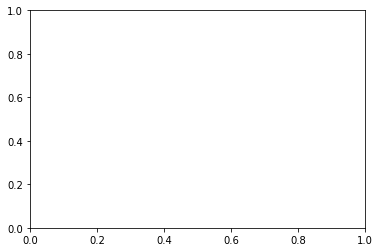

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
axes = plt.gca()
axes.set_ylim([0,.5])
plt.plot(history.history['mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('mean_squared_error')
plt.xlabel('Epoch')
plt.show()

## Examine the Model Accuracy and Confusion Matrix for Training Data

In [ ]:
loss, accuracy, mse = model.evaluate(X_train,y_train)
print("The model loss is {:.2f}, its accuracy is {:.2f}, and mse is {:.2f}. ".format(\
            loss,accuracy, mse))

In [ ]:
loss, accuracy, mse = model.evaluate(X_test,y_test)
print("The model loss is {:.2f}, its accuracy is {:.2f}, and mse is {:.2f}. ".format(\
            loss,accuracy, mse))

## Test Model Generalizability by Examining Its Accuracy Relative to the Training Data
One way to examine model overfit is to give the model some new data and see how it performs.  As we have discussed, if the model is generalizable, its performance with the test data should be comparable to its performance with the training data.

In [ ]:
pred_classes_train = model.predict_classes(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,pred_classes_train)

In [ ]:
pred_classes_test = model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_classes_test)

This is very good news, since the test result is very close to the training result. These results indicate that our model is generalizable--that is, that there is very little overfit. 